In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
path = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv"
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [47]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [50]:
lm.intercept_

38423.3058581574

In [51]:
lm.coef_

array([-821.73337832])

In [52]:
lm1 = LinearRegression()
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
lm1.fit(df[['highway-mpg']],df[['price']])
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [54]:
lm1.coef_

array([[-821.73337832]])

In [55]:
lm1.intercept_

array([38423.30585816])

In [56]:
Z=df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z,df[['price']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
lm.intercept_

array([-15806.62462633])

In [58]:
lm.coef_

array([[53.49574423,  4.70770099, 81.53026382, 36.05748882]])

In [59]:
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses','highway-mpg']], df[['price']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [60]:
lm2.coef_

array([[   1.49789586, -820.45434016]])

In [61]:
import seaborn as sns
%matplotlib inline

(0, 48266.717628286555)

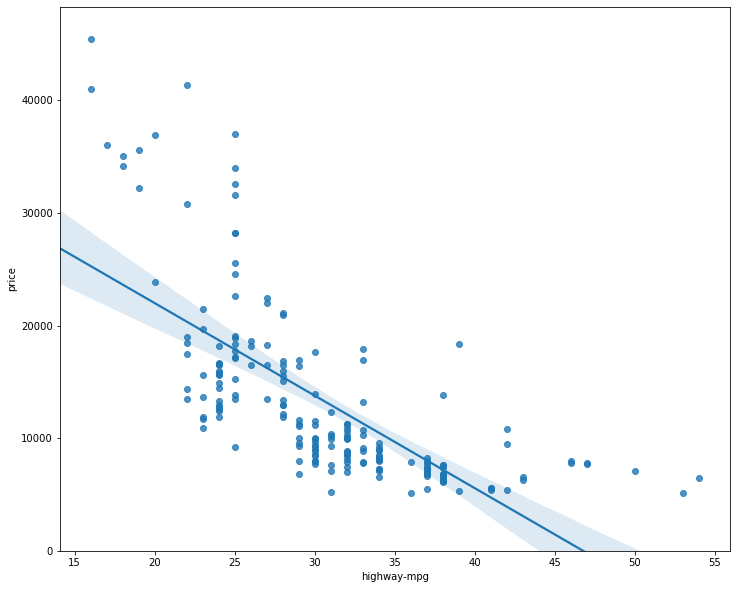

In [62]:
width = 12
height = 10
plt.figure(figsize=(width,height))
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)

(0, 47422.919330307624)

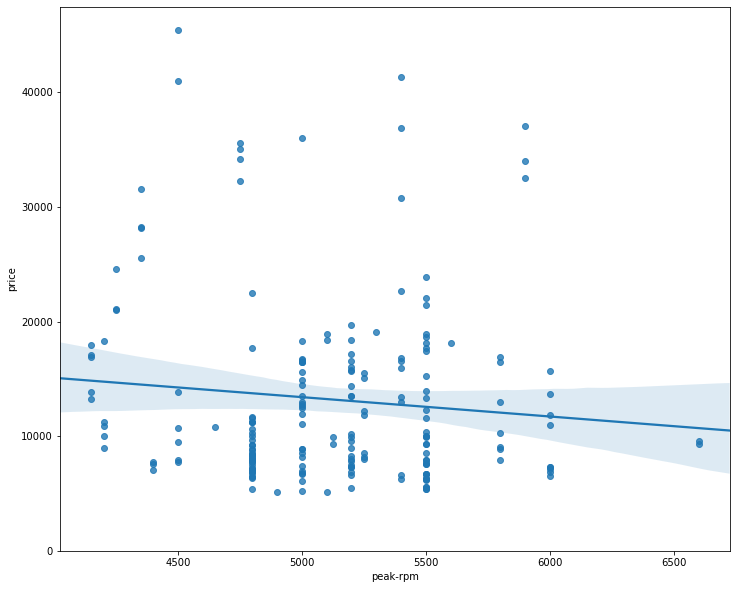

In [63]:
plt.figure(figsize=(width,height))
sns.regplot(x='peak-rpm', y='price', data=df)
plt.ylim(0,)

In [64]:
df[['peak-rpm','highway-mpg','price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


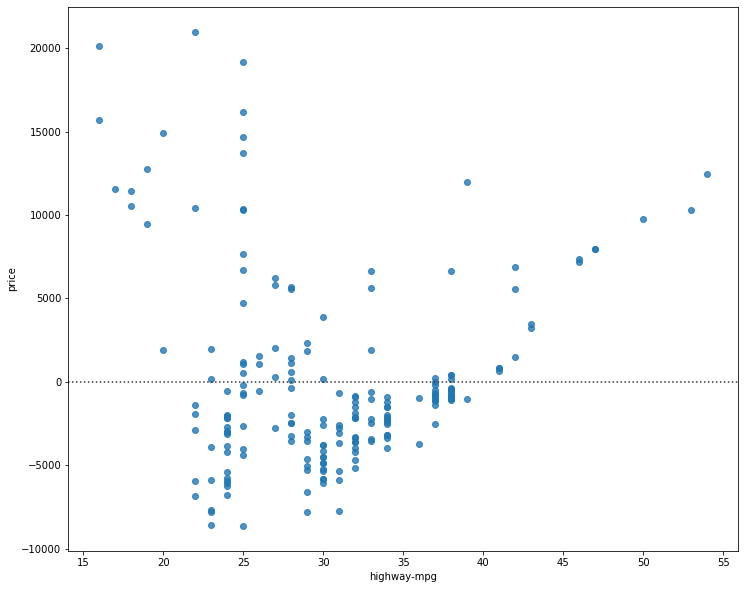

In [65]:
plt.figure(figsize=(width,height))
sns.residplot(df['highway-mpg'],df['price'])
plt.show()

In [66]:
Y_hat = lm.predict(Z)

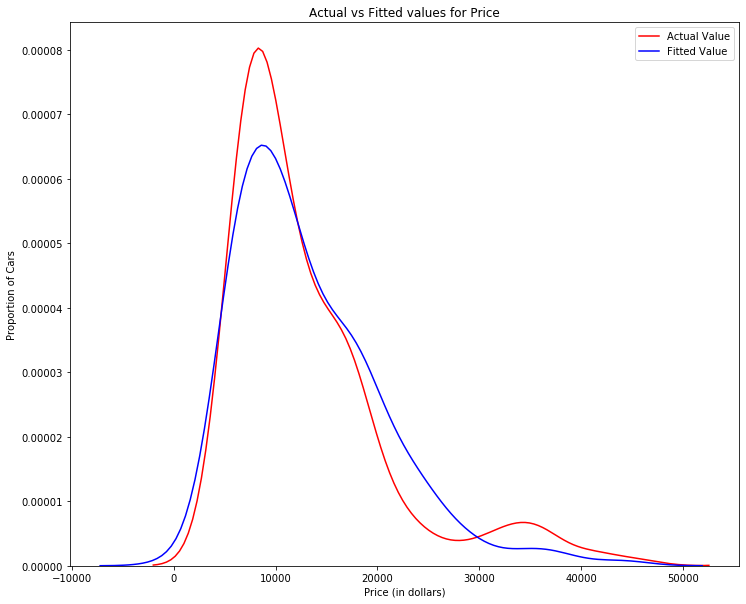

In [67]:
plt.figure(figsize=(width,height))
ax1 = sns.distplot(df['price'], hist=False, color = "r", label = "Actual Value")
sns.distplot(Y_hat, hist=False, color = "b", label = "Fitted Value", ax=ax1)

plt.title("Actual vs Fitted values for Price")
plt.xlabel("Price (in dollars)")
plt.ylabel("Proportion of Cars")

plt.show()
plt.close()

In [68]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15,55,100)
    y_new = model(x_new)
    
    plt.plot(independent_variable, dependent_variable,'.',x_new,y_new,'-')
    plt.title("Polynomial Fit with Matplotlib for Price ~ Length")
    ax = plt.gca()
    ax.set_facecolor((0.898,0.898,0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel("Price of Cars")
    
    plt.show()
    plt.close()

In [69]:
x = df['highway-mpg']
y = df['price']

In [70]:
#a polynomial of the 3rd order
f = np.polyfit(x,y,3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


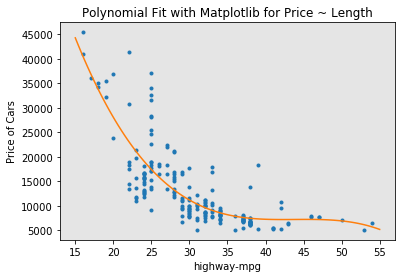

In [71]:
PlotPolly(p,x,y,'highway-mpg')

In [72]:
np.polyfit(x,y,3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


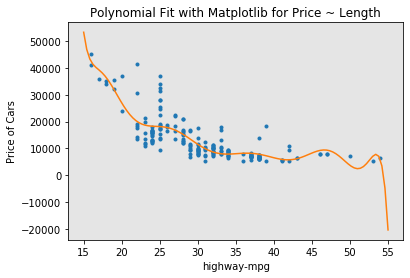

In [73]:
f1 = np.polyfit(x,y,11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y,'highway-mpg')

In [74]:
from sklearn.preprocessing import PolynomialFeatures

In [75]:
pr = PolynomialFeatures(degree = 2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [76]:
Z_pr = pr.fit_transform(Z)

In [77]:
Z.shape

(201, 4)

In [78]:
Z_pr.shape

(201, 15)

In [79]:
#Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [80]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]

In [81]:
pipe = Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [82]:
pipe.fit(Z,y)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [83]:
ypipe = pipe.predict(Z)
ypipe[0:4]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [84]:
#Simple linear regression
lm.fit(X,Y)
print("The R-square is: ", lm.score(X,Y))
Yhat = lm.predict(X)
print("The output of the first four predicted value is: ", Yhat[0:4])

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['price'], Yhat)
print("The mean square error of price and predicted value is: ", mse)

The R-square is:  0.4965911884339176
The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]
The mean square error of price and predicted value is:  31635042.944639888


In [85]:
#Multiple linear regression
lm.fit(Z,df['price'])
print("The R-square is: ", lm.score(Z,df['price']))
Y_predict_multifit = lm.predict(Z)
print("The mean square error of price and predicted value using multifit is: ", mean_squared_error(df['price'],Y_predict_multifit))

The R-square is:  0.8093562806577457
The mean square error of price and predicted value using multifit is:  11980366.87072649


In [86]:
#Polynomial fit
from sklearn.metrics import r2_score

r_squared = r2_score(y,p(x))
print("The R-square value is: ", r_squared)

The R-square value is:  0.6741946663906515


In [87]:
#MSE
mean_squared_error(y,p(x))

20474146.42636124

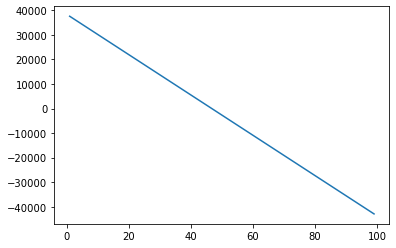

In [89]:
#Prediction
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

new_input = np.arange(1,100,1).reshape(-1,1)
lm.fit(X,Y)
lm

yhat = lm.predict(new_input)
yhat[0:5]

plt.plot(new_input,yhat)
plt.show()